In [311]:
%automagic


Automagic is OFF, % prefix IS needed for line magics.


In [312]:
folder = '/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid/02_Desarrollo'
!ls -ltr {folder}

total 42324
-rw-rw-r-- 1 dsc dsc     1695 oct 19 16:58 00_work_line_notes.txt
-rw-rw-r-- 1 dsc dsc   309961 oct 20 11:55 01_ciclo_prueba_muestra.ipynb
-rw-rw-r-- 1 dsc dsc   337332 oct 23 16:39 02_ciclo_prueba_muestra_ordenado.ipynb
drwxrwxr-x 2 dsc dsc     4096 oct 23 16:56 csv_files
-rw-rw-r-- 1 dsc dsc    26352 oct 29 18:05 residuo.png
-rw-rw-r-- 1 dsc dsc    28090 oct 29 18:05 estacionalidad.png
-rw-rw-r-- 1 dsc dsc    16061 oct 29 18:05 tendencia.png
-rw-rw-r-- 1 dsc dsc    36481 oct 29 18:06 todo.png
-rw-rw-r-- 1 dsc dsc    28121 oct 29 18:37 residuo_nube.png
-rw-rw-r-- 1 dsc dsc    16512 oct 29 18:38 estacionalidad_nube.png
-rw-rw-r-- 1 dsc dsc    28910 oct 29 18:38 tendencia_nube.png
-rw-rw-r-- 1 dsc dsc    48129 oct 29 18:38 todo_nube.png
-rw-rw-r-- 1 dsc dsc  2403149 nov  3 18:08 04_ciclo_prueba_muestra_serie_temporal_lio.ipynb
-rw-rw-r-- 1 dsc dsc  1919420 nov  9 12:25 04_ciclo_prueba_muestra_serie_temporal.ipynb
-rw-rw-r-- 1 dsc dsc  1741628 nov 16 17:12 serie_completa.csv


In [313]:
import os
os.getcwd()

'/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid/02_Desarrollo'

In [314]:
os.chdir(folder)
os.getcwd()

'/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid/02_Desarrollo'

In [315]:
!ls -ltr datos_accs_madrid.csv

-rw-rw-r-- 1 dsc dsc 24017454 nov 16 18:37 datos_accs_madrid.csv


In [316]:
import pandas as pd
df_accs = pd.read_csv("datos_accs_madrid.csv")

In [317]:
# Imports needed for the script
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [318]:
# Análisis Exploratorio Inicial
# Ahora veamos cuantas columnas y registros tenemos:
df_accs.shape

(252998, 11)

In [319]:
df_accs.head(3)

,FECHA,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,20
1,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,50
2,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,VIAJERO,MUJER,HERIDO_LEVE,40


In [320]:
df_accs.dtypes

FECHA             object
HORA              object
DIA_SEMANA        object
DISTRITO          object
NUM_PERSONAS       int64
TIPO_ACCIDENTE    object
TIPO_VEHICULO     object
TIPO_PERSONA      object
SEXO              object
LESIVIDAD         object
EDAD_APROX        object
dtype: object

In [321]:
# Borramos variables innecesarias
drop_elements = ['FECHA', 'NUM_PERSONAS']
df_accs = df_accs.drop(drop_elements, axis = 1)

In [322]:
# algunas visualizaciones para comprender mejor los datos.
# Mirar balanceo de etiquetas

In [323]:
# Comprobar valores nulos
df_accs.isnull().sum()

HORA              0
DIA_SEMANA        0
DISTRITO          0
TIPO_ACCIDENTE    0
TIPO_VEHICULO     0
TIPO_PERSONA      0
SEXO              0
LESIVIDAD         0
EDAD_APROX        0
dtype: int64

In [324]:
df_accs.groupby('HORA').size()

HORA
00:00     4729
01:00     3602
02:00     2776
03:00     2431
04:00     2131
05:00     2225
06:00     3992
07:00     6428
08:00    11759
09:00    14348
10:00    11561
11:00    12492
12:00    14473
13:00    15921
14:00    18232
15:00    14557
16:00    13590
17:00    14137
18:00    16259
19:00    18049
20:00    17244
21:00    14113
22:00    10758
23:00     7191
dtype: int64

In [325]:
df_accs.groupby('DIA_SEMANA').size()

DIA_SEMANA
DOMINGO      27249
JUEVES       38794
LUNES        36301
MARTES       37707
MIERCOLES    38697
SABADO       30798
VIERNES      43452
dtype: int64

In [326]:
df_accs.groupby('DISTRITO').size()

DISTRITO
ARGANZUELA             13050
BARAJAS                 3402
CARABANCHEL            15593
CENTRO                 17717
CHAMARTIN              18857
CHAMBERI               14466
CIUDAD LINEAL          16580
FUENCARRAL-EL PARDO    13750
HORTALEZA               8546
LATINA                 12218
MONCLOA-ARAVACA        13587
MORATALAZ               6246
PUENTE DE VALLECAS     16180
RETIRO                 13665
SALAMANCA              19269
SAN BLAS               11987
TETUAN                 13626
USERA                   8808
VICALVARO               3142
VILLA DE VALLECAS       5601
VILLAVERDE              6708
dtype: int64

In [327]:
df_accs.groupby('TIPO_ACCIDENTE').size()

TIPO_ACCIDENTE
ATROPELLO                     41398
CAIDA_BICICLETA                2616
CAIDA_CICLOMOTOR               2536
CAIDA_MOTOCICLETA             14155
CAIDA_VEHICULO_ 3_ RUEDAS        19
CAIDA_VIAJERO_ BUS             2794
CHOQUE_CON_OBJETO_FIJO        12595
COLISION_DOBLE               145544
COLISION_MULTIPLE             29195
OTRAS_CAUSAS                   1011
VUELCO                         1135
dtype: int64

In [328]:
df_accs.groupby('TIPO_VEHICULO').size()

TIPO_VEHICULO
AMBULANCIA            492
AUTOBUS_AUTOCAR      7017
AUTO_TAXI            8311
BICICLETA            5524
CAMION               2499
CICLOMOTOR           6045
FURGONETA            9873
MOTOCICLETA         32742
NO_ASIGNADO         46852
TURISMO            131483
VARIOS               2117
VEH.3 RUEDAS           43
dtype: int64

In [329]:
df_accs.groupby('TIPO_PERSONA').size()

TIPO_PERSONA
CONDUCTOR    158734
PEATON        15118
TESTIGO       31666
VIAJERO       47480
dtype: int64

In [330]:
df_accs.groupby('SEXO').size()

SEXO
HOMBRE         160165
MUJER           80717
NO_ASIGNADO     12116
dtype: int64

In [331]:
df_accs.groupby('LESIVIDAD').size()

LESIVIDAD
HERIDO_GRAVE      8850
HERIDO_LEVE     102716
INGRESO_LEVE    130053
MUERTO             275
NO_ASIGNADO      11104
dtype: int64

In [332]:
df_accs.groupby('EDAD_APROX').size()

EDAD_APROX
0               3128
10              5124
15              2593
20              9304
25             49329
30             31110
35             30169
40             26421
45             22167
50             17999
55             12454
65             13459
70              3656
75              6361
NO_ASIGNADO    19724
dtype: int64

In [333]:
# Veamos cuántos registros hay según DIA_SEMANA, como variable central:

In [334]:
df_accs.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'TIPO_ACCIDENTE', 'TIPO_VEHICULO',
       'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],
      dtype='object')

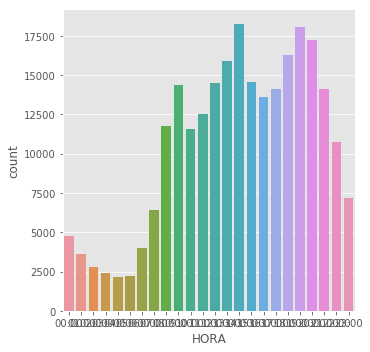

In [335]:
sb.catplot('HORA',data=df_accs,kind="count", \
           order=['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', \
                  '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', \
                  '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', \
                  '18:00', '19:00', '20:00', '21:00', '22:00', '23:00']
          )

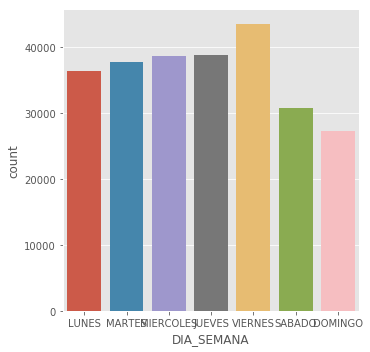

In [336]:
sb.catplot('DIA_SEMANA',data=df_accs,kind="count", \
           order=['LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES', 'SABADO', 'DOMINGO']
          )

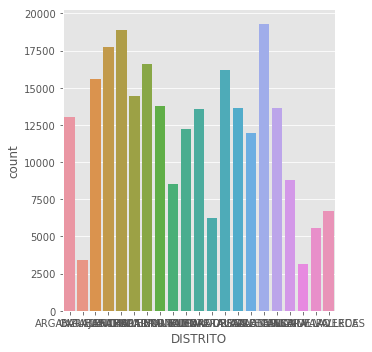

In [337]:
sb.catplot('DISTRITO',data=df_accs,kind="count", \
           order = ['ARGANZUELA', 'BARAJAS', 'CARABANCHEL', 'CENTRO', 'CHAMARTIN', \
                    'CHAMBERI', 'CIUDAD LINEAL', 'FUENCARRAL-EL PARDO', 'HORTALEZA', \
                    'LATINA', 'MONCLOA-ARAVACA', 'MORATALAZ', 'PUENTE DE VALLECAS', \
                    'RETIRO', 'SAN BLAS', 'SALAMANCA', 'TETUAN', 'USERA', 'VICALVARO', \
                    'VILLA DE VALLECAS', 'VILLAVERDE']
          )

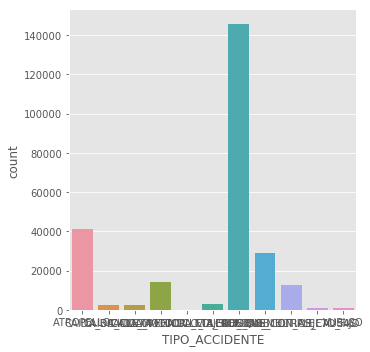

In [338]:
sb.catplot('TIPO_ACCIDENTE',data=df_accs,kind="count", \
           order = ['ATROPELLO', 'CAIDA_BICICLETA', 'CAIDA_CICLOMOTOR', 'CAIDA_MOTOCICLETA', \
                    'CAIDA_VEHICULO_ 3_ RUEDAS', 'CAIDA_VIAJERO_ BUS', 'COLISION_DOBLE', \
                    'COLISION_MULTIPLE', 'CHOQUE_CON_OBJETO_FIJO', 'OTRAS_CAUSAS', 'VUELCO']
          )

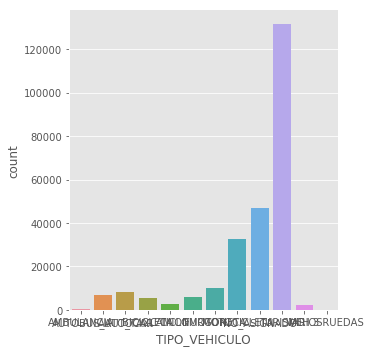

In [339]:
sb.catplot('TIPO_VEHICULO',data=df_accs,kind="count", \
           order = ['AMBULANCIA', 'AUTOBUS_AUTOCAR', 'AUTO_TAXI', 'BICICLETA', 'CAMION', \
                    'CICLOMOTOR', 'FURGONETA', 'MOTOCICLETA', 'NO_ASIGNADO', 'TURISMO', \
                    'VARIOS', 'VEH.3 RUEDAS']
          )

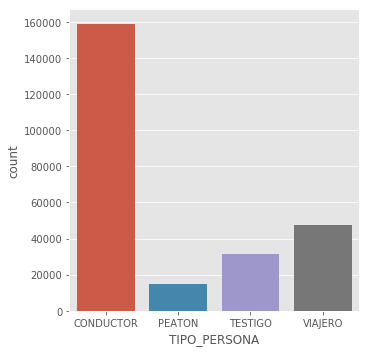

In [340]:
sb.catplot('TIPO_PERSONA',data=df_accs,kind="count", \
           order = ['CONDUCTOR', 'PEATON', 'TESTIGO', 'VIAJERO']
          )

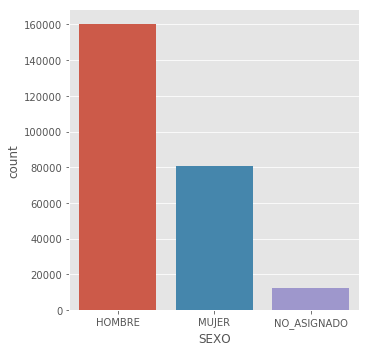

In [341]:
sb.catplot('SEXO',data=df_accs,kind="count", \
           order = ['HOMBRE', 'MUJER', 'NO_ASIGNADO']
          )

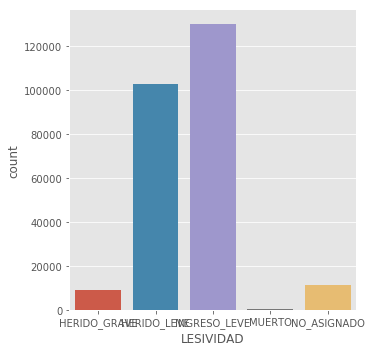

In [342]:
sb.catplot('LESIVIDAD',data=df_accs,kind="count", \
           order = ['HERIDO_GRAVE', 'HERIDO_LEVE', 'INGRESO_LEVE', 'MUERTO', 'NO_ASIGNADO']
          )

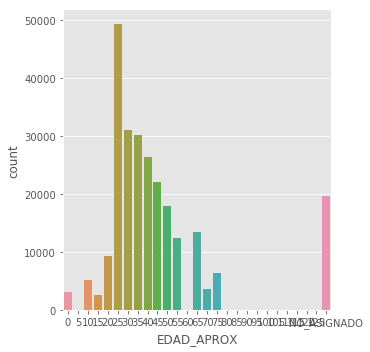

In [343]:
sb.catplot('EDAD_APROX',data=df_accs,kind="count", \
           order = ['0', '5', '10', '15', '20', '25', '30', '35', '40', '45', '50', \
                    '55', '60', '65', '70', '75', '80', '85', '90', '95', '100', \
                    '105', '110', '115', '120', '125', 'NO_ASIGNADO']
          )

In [344]:
df_accs.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'TIPO_ACCIDENTE', 'TIPO_VEHICULO',
       'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],
      dtype='object')

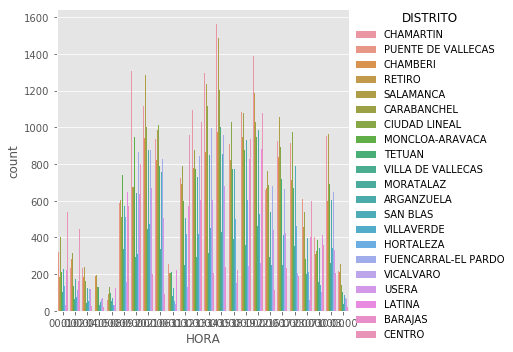

In [345]:
sb.catplot('HORA',data=df_accs,hue='DISTRITO',kind="count")

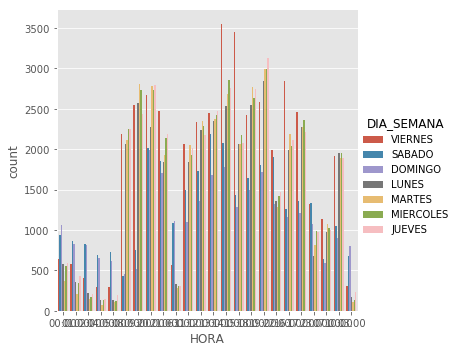

In [346]:
sb.catplot('HORA',data=df_accs,hue='DIA_SEMANA',kind="count")

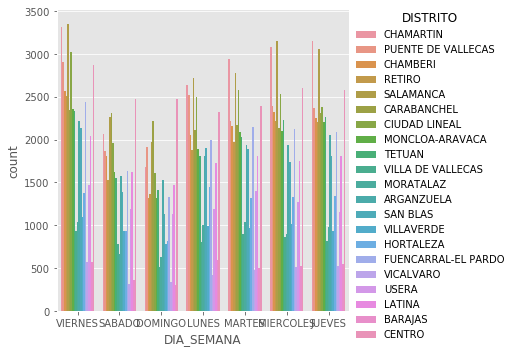

In [347]:
sb.catplot('DIA_SEMANA',data=df_accs,hue='DISTRITO',kind="count")

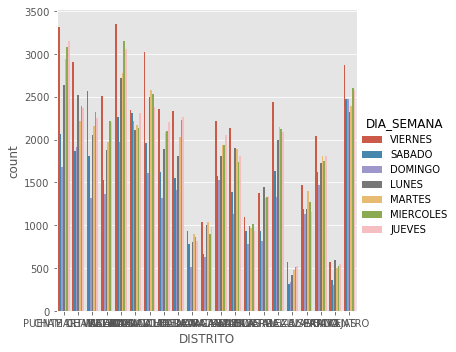

In [348]:
sb.catplot('DISTRITO',data=df_accs,hue='DIA_SEMANA',kind="count")

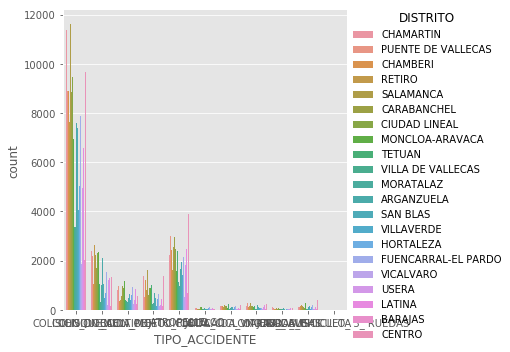

In [349]:
sb.catplot('TIPO_ACCIDENTE',data=df_accs,hue='DISTRITO',kind="count")

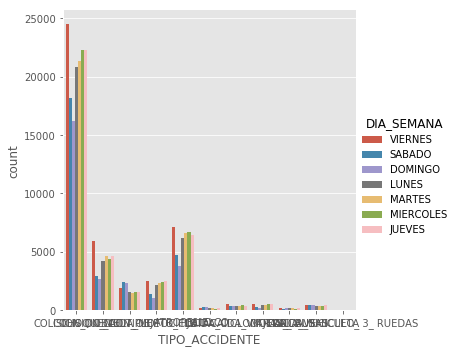

In [350]:
sb.catplot('TIPO_ACCIDENTE',data=df_accs,hue='DIA_SEMANA',kind="count")

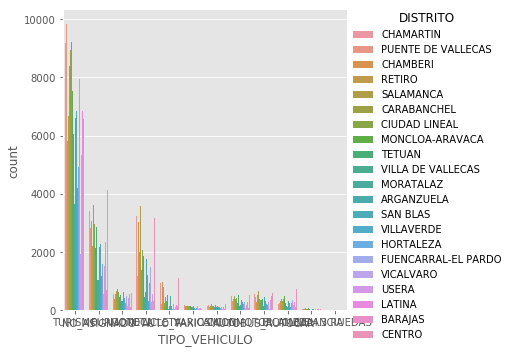

In [351]:
sb.catplot('TIPO_VEHICULO',data=df_accs,hue='DISTRITO',kind="count")

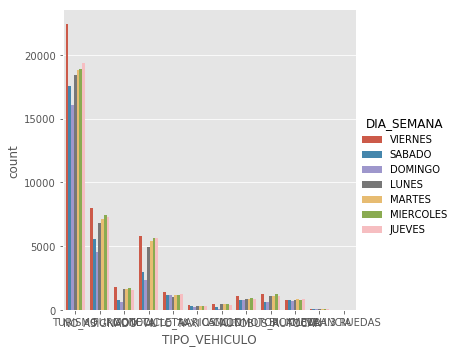

In [352]:
sb.catplot('TIPO_VEHICULO',data=df_accs,hue='DIA_SEMANA',kind="count")

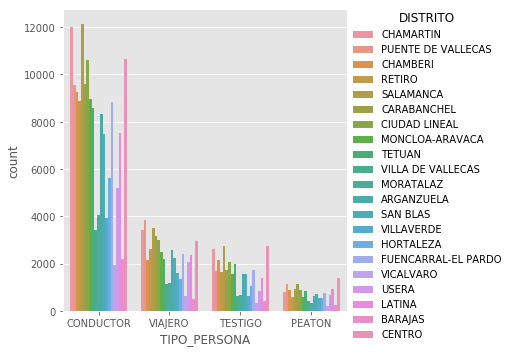

In [353]:
sb.catplot('TIPO_PERSONA',data=df_accs,hue='DISTRITO',kind="count")

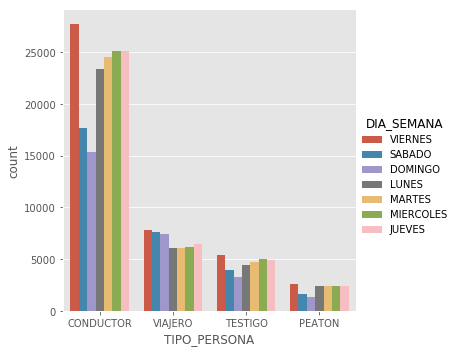

In [354]:
sb.catplot('TIPO_PERSONA',data=df_accs,hue='DIA_SEMANA',kind="count")

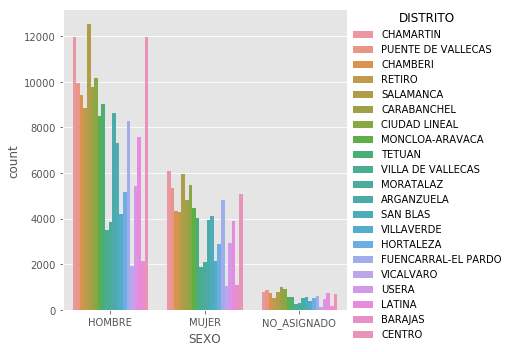

In [355]:
sb.catplot('SEXO',data=df_accs,hue='DISTRITO',kind="count")

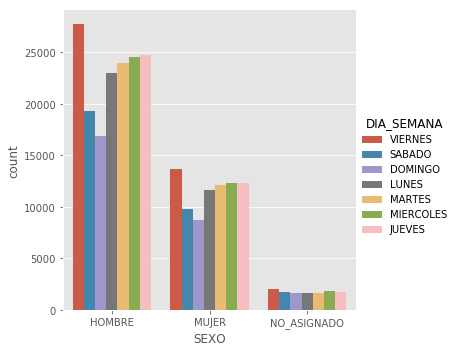

In [356]:
sb.catplot('SEXO',data=df_accs,hue='DIA_SEMANA',kind="count")

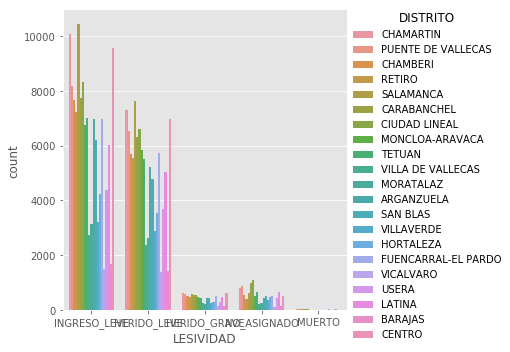

In [357]:
sb.catplot('LESIVIDAD',data=df_accs,hue='DISTRITO',kind="count")

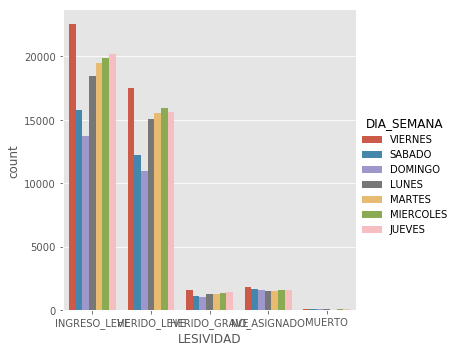

In [358]:
sb.catplot('LESIVIDAD',data=df_accs,hue='DIA_SEMANA',kind="count")

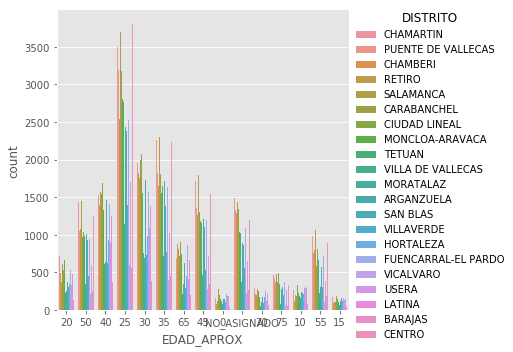

In [359]:
sb.catplot('EDAD_APROX',data=df_accs,hue='DISTRITO',kind="count")

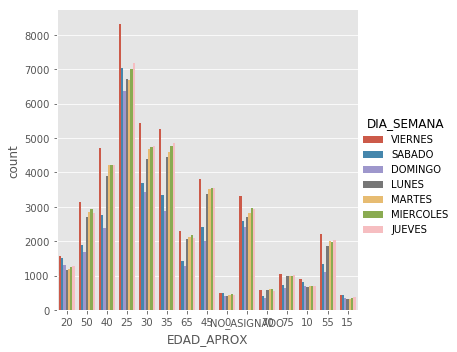

In [360]:
sb.catplot('EDAD_APROX',data=df_accs,hue='DIA_SEMANA',kind="count")

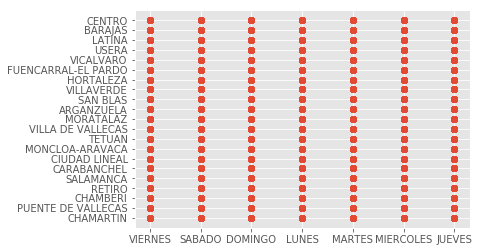

In [361]:
plt.scatter(df_accs['DIA_SEMANA'].values, df_accs['DISTRITO'].values)
plt.show()

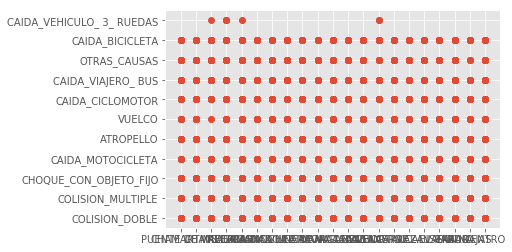

In [362]:
plt.scatter(df_accs['DISTRITO'].values, df_accs['TIPO_ACCIDENTE'].values)
plt.show()

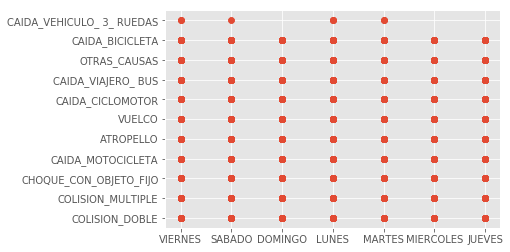

In [363]:
plt.scatter(df_accs['DIA_SEMANA'].values, df_accs['TIPO_ACCIDENTE'].values)
plt.show()

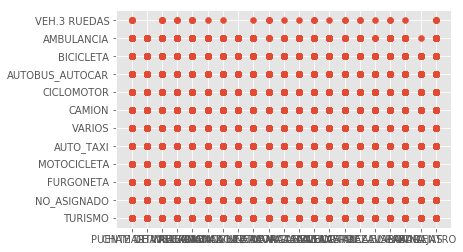

In [364]:
plt.scatter(df_accs['DISTRITO'].values, df_accs['TIPO_VEHICULO'].values)
plt.show()

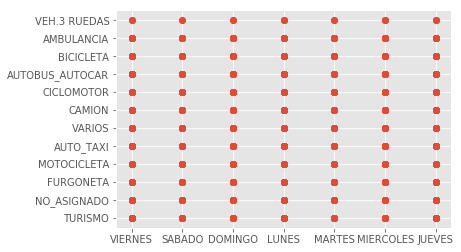

In [365]:
plt.scatter(df_accs['DIA_SEMANA'].values, df_accs['TIPO_VEHICULO'].values)
plt.show()

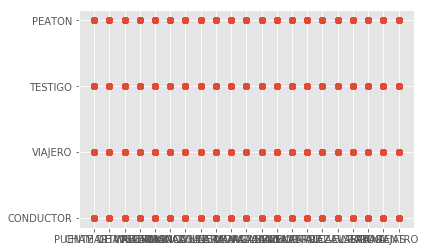

In [366]:
plt.scatter(df_accs['DISTRITO'].values, df_accs['TIPO_PERSONA'].values)
plt.show()

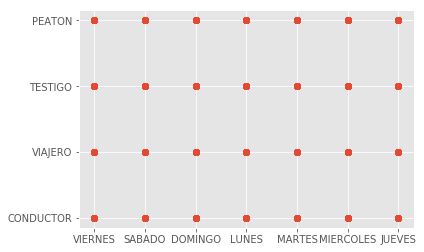

In [367]:
plt.scatter(df_accs['DIA_SEMANA'].values, df_accs['TIPO_PERSONA'].values)
plt.show()

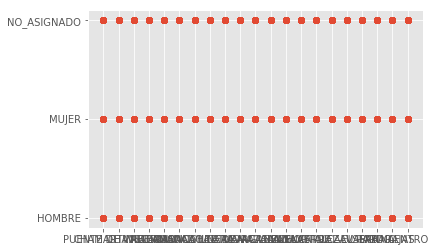

In [368]:
plt.scatter(df_accs['DISTRITO'].values, df_accs['SEXO'].values)
plt.show()

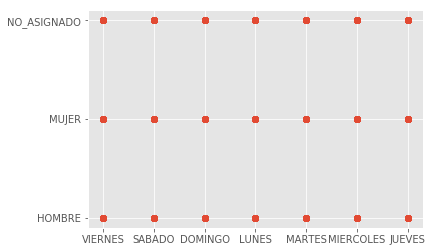

In [369]:
plt.scatter(df_accs['DIA_SEMANA'].values, df_accs['SEXO'].values)
plt.show()

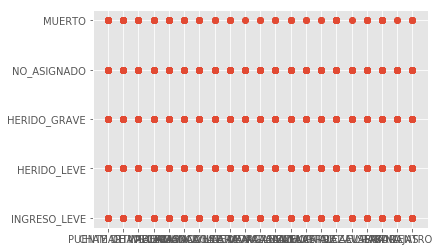

In [370]:
plt.scatter(df_accs['DISTRITO'].values, df_accs['LESIVIDAD'].values)
plt.show()

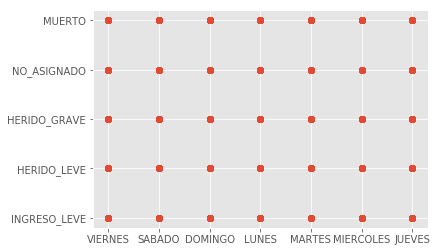

In [371]:
plt.scatter(df_accs['DIA_SEMANA'].values, df_accs['LESIVIDAD'].values)
plt.show()

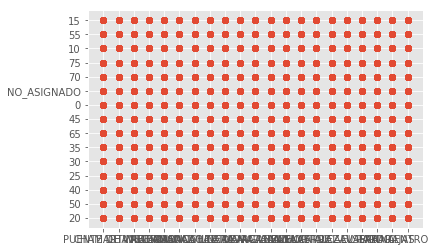

In [372]:
plt.scatter(df_accs['DISTRITO'].values, df_accs['EDAD_APROX'].values)
plt.show()

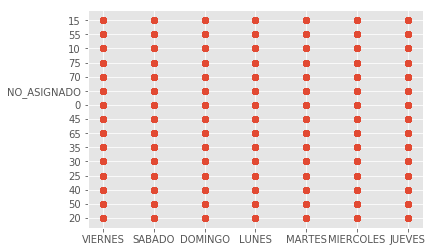

In [373]:
plt.scatter(df_accs['DIA_SEMANA'].values, df_accs['EDAD_APROX'].values)
plt.show()

In [374]:
# Mapeo de datos

In [375]:
#Filtro: Columnas que empiezan por xxx
#filtro_borrar = [col for col in df_accs if col.startswith('NUM_PERS')]
# borrar columnas sobrantes:
#df_accs = df_accs.drop(columns=filtro_borrar)

In [376]:
df_accs_lab = df_accs.copy()

In [377]:
df_accs.head(1)

,HORA,DIA_SEMANA,DISTRITO,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,00:00,VIERNES,CHAMARTIN,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,20


In [378]:
df_accs_lab.head(1)

,HORA,DIA_SEMANA,DISTRITO,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,00:00,VIERNES,CHAMARTIN,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,20


In [379]:
df_accs.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'TIPO_ACCIDENTE', 'TIPO_VEHICULO',
       'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],
      dtype='object')

In [380]:
df_accs_lab.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'TIPO_ACCIDENTE', 'TIPO_VEHICULO',
       'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],
      dtype='object')

In [381]:
df_accs.dtypes

HORA              object
DIA_SEMANA        object
DISTRITO          object
TIPO_ACCIDENTE    object
TIPO_VEHICULO     object
TIPO_PERSONA      object
SEXO              object
LESIVIDAD         object
EDAD_APROX        object
dtype: object

In [382]:
df_accs_lab.dtypes

HORA              object
DIA_SEMANA        object
DISTRITO          object
TIPO_ACCIDENTE    object
TIPO_VEHICULO     object
TIPO_PERSONA      object
SEXO              object
LESIVIDAD         object
EDAD_APROX        object
dtype: object

In [383]:
# No haría falta: df_accs_lab["EDAD_APROX"]=df_accs_lab['EDAD_APROX'].astype(np.int64)

In [384]:
!ls -ltr {folder}/ditri*

ls: cannot access '/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid/02_Desarrollo/ditri*': No such file or directory


In [385]:
import os
os.getcwd()

'/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid/02_Desarrollo'

In [386]:
!ls -ltr distritos_municipio_madrid.csv

-rw-rw-r-- 1 dsc dsc 1164 nov 22 17:41 distritos_municipio_madrid.csv


In [387]:
df_distritos = pd.read_csv("distritos_municipio_madrid.csv", sep=';', encoding='latin-1')

In [388]:
df_distritos.columns

Index(['distrito_codigo', 'distrito_nombre', 'municipio_codigo',
       'municipio_nombre', 'superficie_km2', 'densidad_por_km2'],
      dtype='object')

In [389]:
df_distritos.head(3)

,distrito_codigo,distrito_nombre,municipio_codigo,municipio_nombre,superficie_km2,densidad_por_km2
0,79601,Centro,796,Madrid,5.21,25340.69
1,79602,Arganzuela,796,Madrid,6.52,23306.44
2,79603,Retiro,796,Madrid,5.42,21867.53


In [390]:
drop_elements = ['municipio_codigo', 'municipio_nombre']
df_distritos_lab = df_distritos.drop(drop_elements, axis = 1)

In [391]:
df_distritos_lab.columns

Index(['distrito_codigo', 'distrito_nombre', 'superficie_km2',
       'densidad_por_km2'],
      dtype='object')

In [392]:
df_distritos_lab.head(3)

,distrito_codigo,distrito_nombre,superficie_km2,densidad_por_km2
0,79601,Centro,5.21,25340.69
1,79602,Arganzuela,6.52,23306.44
2,79603,Retiro,5.42,21867.53


In [393]:
df_distritos_lab.dtypes

distrito_codigo       int64
distrito_nombre      object
superficie_km2      float64
densidad_por_km2    float64
dtype: object

In [394]:
df_distritos_lab.shape

(21, 4)

In [395]:
df_accs.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'TIPO_ACCIDENTE', 'TIPO_VEHICULO',
       'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],
      dtype='object')

In [396]:
df_distritos_lab = df_distritos_lab.rename(columns = {'distrito_nombre':'DISTRITO'})

In [397]:
df_distritos_lab.head()

,distrito_codigo,DISTRITO,superficie_km2,densidad_por_km2
0,79601,Centro,5.21,25340.69
1,79602,Arganzuela,6.52,23306.44
2,79603,Retiro,5.42,21867.53
3,79604,Salamanca,5.36,26830.78
4,79605,Chamartín,9.12,15723.25


In [398]:
df_accs.head(3)

,HORA,DIA_SEMANA,DISTRITO,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,00:00,VIERNES,CHAMARTIN,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,20
1,00:00,VIERNES,CHAMARTIN,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,50
2,00:00,VIERNES,CHAMARTIN,COLISION_DOBLE,TURISMO,VIAJERO,MUJER,HERIDO_LEVE,40


In [399]:
df_accs['DISTRITO'].unique()

array(['CHAMARTIN', 'PUENTE DE VALLECAS', 'CHAMBERI', 'RETIRO',
       'SALAMANCA', 'CARABANCHEL', 'CIUDAD LINEAL', 'MONCLOA-ARAVACA',
       'TETUAN', 'VILLA DE VALLECAS', 'MORATALAZ', 'ARGANZUELA',
       'SAN BLAS', 'VILLAVERDE', 'HORTALEZA', 'FUENCARRAL-EL PARDO',
       'VICALVARO', 'USERA', 'LATINA', 'BARAJAS', 'CENTRO'], dtype=object)

In [400]:
df_distritos_lab['DISTRITO'].unique()

array(['    Centro ', '    Arganzuela ', '    Retiro ', '    Salamanca ',
       '    Chamartín ', '    Tetuan ', '    Chamberí ',
       '    Fuencarral-El Pardo ', '    Moncloa-Aravaca ', '    Latina ',
       '    Carabanchel ', '    Usera ', '    Puente de Vallecas ',
       '    Moratalaz ', '    Ciudad Lineal ', '    Hortaleza ',
       '    Villaverde ', '    Villa de Vallecas ', '    Vicálvaro ',
       '    San Blas-Canillejas ', '    Barajas '], dtype=object)

In [401]:
# strip leading and trailing space only strings
df_distritos_lab['DISTRITO'] = df_distritos_lab['DISTRITO'].str.strip()


In [402]:
df_distritos_lab['DISTRITO'].unique()

array(['Centro', 'Arganzuela', 'Retiro', 'Salamanca', 'Chamartín',
       'Tetuan', 'Chamberí', 'Fuencarral-El Pardo', 'Moncloa-Aravaca',
       'Latina', 'Carabanchel', 'Usera', 'Puente de Vallecas',
       'Moratalaz', 'Ciudad Lineal', 'Hortaleza', 'Villaverde',
       'Villa de Vallecas', 'Vicálvaro', 'San Blas-Canillejas', 'Barajas'],
      dtype=object)

In [403]:
df_accs['DISTRITO'].unique()

array(['CHAMARTIN', 'PUENTE DE VALLECAS', 'CHAMBERI', 'RETIRO',
       'SALAMANCA', 'CARABANCHEL', 'CIUDAD LINEAL', 'MONCLOA-ARAVACA',
       'TETUAN', 'VILLA DE VALLECAS', 'MORATALAZ', 'ARGANZUELA',
       'SAN BLAS', 'VILLAVERDE', 'HORTALEZA', 'FUENCARRAL-EL PARDO',
       'VICALVARO', 'USERA', 'LATINA', 'BARAJAS', 'CENTRO'], dtype=object)

In [404]:
df_distritos_lab['DISTRITO'] = df_distritos_lab['DISTRITO'].str.upper()

In [405]:
df_distritos_lab['DISTRITO'].unique()

array(['CENTRO', 'ARGANZUELA', 'RETIRO', 'SALAMANCA', 'CHAMARTÍN',
       'TETUAN', 'CHAMBERÍ', 'FUENCARRAL-EL PARDO', 'MONCLOA-ARAVACA',
       'LATINA', 'CARABANCHEL', 'USERA', 'PUENTE DE VALLECAS',
       'MORATALAZ', 'CIUDAD LINEAL', 'HORTALEZA', 'VILLAVERDE',
       'VILLA DE VALLECAS', 'VICÁLVARO', 'SAN BLAS-CANILLEJAS', 'BARAJAS'],
      dtype=object)

In [406]:
df_accs['DISTRITO'].unique()

array(['CHAMARTIN', 'PUENTE DE VALLECAS', 'CHAMBERI', 'RETIRO',
       'SALAMANCA', 'CARABANCHEL', 'CIUDAD LINEAL', 'MONCLOA-ARAVACA',
       'TETUAN', 'VILLA DE VALLECAS', 'MORATALAZ', 'ARGANZUELA',
       'SAN BLAS', 'VILLAVERDE', 'HORTALEZA', 'FUENCARRAL-EL PARDO',
       'VICALVARO', 'USERA', 'LATINA', 'BARAJAS', 'CENTRO'], dtype=object)

In [407]:
df_distritos_lab["DISTRITO"] = df_distritos_lab["DISTRITO"].replace({"CHAMARTÍN":"CHAMARTIN"}, regex=True)
df_distritos_lab["DISTRITO"] = df_distritos_lab["DISTRITO"].replace({"CHAMBERÍ":"CHAMBERI"}, regex=True)
df_distritos_lab["DISTRITO"] = df_distritos_lab["DISTRITO"].replace({"VICÁLVARO":"VICALVARO"}, regex=True)
df_distritos_lab["DISTRITO"] = df_distritos_lab["DISTRITO"].replace({"SAN BLAS-CANILLEJAS":"SAN BLAS"}, regex=True)

In [408]:
df_distritos_lab['DISTRITO'].unique()

array(['CENTRO', 'ARGANZUELA', 'RETIRO', 'SALAMANCA', 'CHAMARTIN',
       'TETUAN', 'CHAMBERI', 'FUENCARRAL-EL PARDO', 'MONCLOA-ARAVACA',
       'LATINA', 'CARABANCHEL', 'USERA', 'PUENTE DE VALLECAS',
       'MORATALAZ', 'CIUDAD LINEAL', 'HORTALEZA', 'VILLAVERDE',
       'VILLA DE VALLECAS', 'VICALVARO', 'SAN BLAS', 'BARAJAS'],
      dtype=object)

In [409]:
df_distritos_lab.columns

Index(['distrito_codigo', 'DISTRITO', 'superficie_km2', 'densidad_por_km2'], dtype='object')

In [410]:
df_distritos_lab['distrito_codigo'].unique()

array([79601, 79602, 79603, 79604, 79605, 79606, 79607, 79608, 79609,
       79610, 79611, 79612, 79613, 79614, 79615, 79616, 79617, 79618,
       79619, 79620, 79621])

In [411]:
df_distritos_lab['superficie_km2'].unique()

array([  5.21,   6.52,   5.42,   5.36,   9.12,   5.37,   4.73, 238.  ,
        46.47,  25.47,  14.1 ,   7.7 ,  14.84,   6.08,  11.52,  25.87,
        20.21,  51.49,  35.36,  22.26,  43.56])

In [412]:
df_distritos_lab['densidad_por_km2'].unique()

array([25340.69, 23306.44, 21867.53, 26830.78, 15723.25, 28664.25,
       29049.26,  1003.  ,  2515.26,  9183.75, 17316.88, 17535.32,
       15345.01, 15493.59, 18455.56,  6973.33,  7059.13,  2026.82,
        1981.11,  6934.37,  1076.06])

In [413]:
# Comprobar valores nulos
df_distritos_lab.isnull().sum()

distrito_codigo     0
DISTRITO            0
superficie_km2      0
densidad_por_km2    0
dtype: int64

In [414]:
from functools import reduce
df_accs_join_dist = [df_accs, df_distritos_lab]
df_accs_join_dist = reduce(lambda left,right: pd.merge(left,right, on=['DISTRITO']), df_accs_join_dist)
df_accs_join_dist

,HORA,DIA_SEMANA,DISTRITO,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX,distrito_codigo,superficie_km2,densidad_por_km2
0,00:00,VIERNES,CHAMARTIN,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,20,79605,9.12,15723.25
1,00:00,VIERNES,CHAMARTIN,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,50,79605,9.12,15723.25
2,00:00,VIERNES,CHAMARTIN,COLISION_DOBLE,TURISMO,VIAJERO,MUJER,HERIDO_LEVE,40,79605,9.12,15723.25
3,20:00,DOMINGO,CHAMARTIN,COLISION_DOBLE,NO_ASIGNADO,TESTIGO,NO_ASIGNADO,INGRESO_LEVE,NO_ASIGNADO,79605,9.12,15723.25
4,20:00,DOMINGO,CHAMARTIN,COLISION_DOBLE,NO_ASIGNADO,TESTIGO,HOMBRE,INGRESO_LEVE,45,79605,9.12,15723.25
...,...,...,...,...,...,...,...,...,...,...,...,...
252993,16:00,DOMINGO,CENTRO,ATROPELLO,MOTOCICLETA,CONDUCTOR,HOMBRE,INGRESO_LEVE,50,79601,5.21,25340.69
252994,21:00,LUNES,CENTRO,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,50,79601,5.21,25340.69
252995,21:00,LUNES,CENTRO,COLISION_DOBLE,AUTO_TAXI,CONDUCTOR,HOMBRE,INGRESO_LEVE,30,79601,5.21,25340.69
252996,21:00,LUNES,CENTRO,COLISION_DOBLE,AUTO_TAXI,VIAJERO,MUJER,INGRESO_LEVE,25,79601,5.21,25340.69


In [415]:
df_accs_join_dist.shape

(252998, 12)

In [416]:
df_accs_join_dist.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'TIPO_ACCIDENTE', 'TIPO_VEHICULO',
       'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX', 'distrito_codigo',
       'superficie_km2', 'densidad_por_km2'],
      dtype='object')

In [417]:
df_accs_join_dist = df_accs_join_dist.rename(columns = {'distrito_codigo':'COD_DISTRITO'})
df_accs_join_dist = df_accs_join_dist.rename(columns = {'superficie_km2':'SUP_KM2'})
df_accs_join_dist = df_accs_join_dist.rename(columns = {'densidad_por_km2':'DENSIDAD_KM2'})

In [418]:
df_accs_join_dist.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'TIPO_ACCIDENTE', 'TIPO_VEHICULO',
       'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX', 'COD_DISTRITO',
       'SUP_KM2', 'DENSIDAD_KM2'],
      dtype='object')

In [419]:
df_accs_join_dist["COD_DISTRITO"].unique()

array([79605, 79613, 79607, 79603, 79604, 79611, 79615, 79609, 79606,
       79618, 79614, 79602, 79620, 79617, 79616, 79608, 79619, 79612,
       79610, 79621, 79601])

In [420]:
df_accs_join_dist["SUP_KM2"].unique()

array([  9.12,  14.84,   4.73,   5.42,   5.36,  14.1 ,  11.52,  46.47,
         5.37,  51.49,   6.08,   6.52,  22.26,  20.21,  25.87, 238.  ,
        35.36,   7.7 ,  25.47,  43.56,   5.21])

In [421]:
df_accs_join_dist["DENSIDAD_KM2"].unique()

array([15723.25, 15345.01, 29049.26, 21867.53, 26830.78, 17316.88,
       18455.56,  2515.26, 28664.25,  2026.82, 15493.59, 23306.44,
        6934.37,  7059.13,  6973.33,  1003.  ,  1981.11, 17535.32,
        9183.75,  1076.06, 25340.69])

In [422]:
df_accs_join_dist.dtypes

HORA               object
DIA_SEMANA         object
DISTRITO           object
TIPO_ACCIDENTE     object
TIPO_VEHICULO      object
TIPO_PERSONA       object
SEXO               object
LESIVIDAD          object
EDAD_APROX         object
COD_DISTRITO        int64
SUP_KM2           float64
DENSIDAD_KM2      float64
dtype: object

In [423]:
df_accs_join_dist.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'TIPO_ACCIDENTE', 'TIPO_VEHICULO',
       'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX', 'COD_DISTRITO',
       'SUP_KM2', 'DENSIDAD_KM2'],
      dtype='object')

In [ ]:
##########

In [425]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

In [467]:
preprocess = make_column_transformer((OneHotEncoder(), ['HORA', 'DIA_SEMANA', 'DISTRITO', 'TIPO_ACCIDENTE', \
                                                        'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', \
                                                        'LESIVIDAD', 'EDAD_APROX']), \
                                     (StandardScaler(), ['COD_DISTRITO', 'SUP_KM2', 'DENSIDAD_KM2'])
                                    )

In [472]:
df_accs_preprocess = preprocess.fit_transform(df_accs_join_dist).toarray()[:]

In [473]:
type(df_accs_preprocess)

numpy.ndarray

In [474]:
df_accs_preprocess.shape

(252998, 105)

In [479]:
df_accs_preprocess[0]

array([ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [424]:
##########

In [502]:
df_accs_join_dist.dtypes

HORA               object
DIA_SEMANA         object
DISTRITO           object
TIPO_ACCIDENTE     object
TIPO_VEHICULO      object
TIPO_PERSONA       object
SEXO               object
LESIVIDAD          object
EDAD_APROX         object
COD_DISTRITO        int64
SUP_KM2           float64
DENSIDAD_KM2      float64
dtype: object

In [503]:
categorical_feature_mask

HORA               True
DIA_SEMANA         True
DISTRITO           True
TIPO_ACCIDENTE     True
TIPO_VEHICULO      True
TIPO_PERSONA       True
SEXO               True
LESIVIDAD          True
EDAD_APROX         True
COD_DISTRITO      False
SUP_KM2           False
DENSIDAD_KM2      False
dtype: bool

In [173]:
# Puesto que es multiclass, para no perder valor de rendimiento, necesitamos aplicar también,
# OneHotEndoder
# import OneHotEncoder
#from sklearn.preprocessing import OneHotEncoder
# instantiate OneHotEncoder
# ohe = OneHotEncoder(categorical_feature_mask, sparse=False ) 
# sparse = False output an array not sparse matrix
#ohe = OneHotEncoder(handle_unknown='ignore')
#ohe_DISTRITO = [['ARGANZUELA',1], ['BARAJAS',2], ['CARABANCHEL',3], ['CENTRO',4], ['CHAMARTIN',5], \
#                ['CHAMBERI',6], ['CIUDAD LINEAL',7], ['FUENCARRAL-EL PARDO',8], ['HORTALEZA',9], \
#                ['LATINA',10], ['MONCLOA-ARAVACA',11], ['MORATALAZ',12], ['PUENTE DE VALLECAS',13], \
#                ['RETIRO',14], ['SAN BLAS',15], ['SALAMANCA',16], ['TETUAN',17], ['USERA',18], \
#                ['VICALVARO',19], ['VILLA DE VALLECAS',20], ['VILLAVERDE',21]]
#df_accs_ohe = ohe.fit(ohe_DISTRITO)

In [505]:
#df_accs_ohe.categories_

In [299]:
###########

In [506]:
df_accs_join_dist.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'TIPO_ACCIDENTE', 'TIPO_VEHICULO',
       'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX', 'COD_DISTRITO',
       'SUP_KM2', 'DENSIDAD_KM2'],
      dtype='object')

In [ ]:
# Etiquetamos mediante One Hot Encoding
#from sklearn.preprocessing import OneHotEncoder
#onehotencoder = OneHotEncoder(categorical_features = [2])
#x = onehotencoder.fit_transform(x).toarray()

In [508]:
# Etiquetamos mediante Label Encoding sólo por visualización
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder() 

In [509]:
#df_accs_join_dist['FECHA']= lab.fit_transform(df_accs_join_dist['FECHA'])
df_accs_join_dist['HORA']= lab.fit_transform(df_accs_join_dist['HORA'])
df_accs_join_dist['DIA_SEMANA']= lab.fit_transform(df_accs_join_dist['DIA_SEMANA'])
df_accs_join_dist['DISTRITO']= lab.fit_transform(df_accs_join_dist['DISTRITO'])
df_accs_join_dist['TIPO_ACCIDENTE']= lab.fit_transform(df_accs_join_dist['TIPO_ACCIDENTE'])
df_accs_join_dist['TIPO_VEHICULO']= lab.fit_transform(df_accs_join_dist['TIPO_VEHICULO'])
df_accs_join_dist['TIPO_PERSONA']= lab.fit_transform(df_accs_join_dist['TIPO_PERSONA'])
df_accs_join_dist['SEXO']= lab.fit_transform(df_accs_join_dist['SEXO'])
df_accs_join_dist['LESIVIDAD']= lab.fit_transform(df_accs_join_dist['LESIVIDAD'])
## Para escalabilizar los datos de la EDAD_APROX y poder incluirlos, los transformamos.
df_accs_join_dist['EDAD_APROX']= lab.fit_transform(df_accs_join_dist['EDAD_APROX'])
#df_accs_join_dist['NUMS_PERS_IMPLS']= lab.fit_transform(df_accs_join_dist['NUM_PERS_IMPLS'])
#df_accs_join_dist['SUP_KM2']= lab.fit_transform(df_accs_join_dist['SUP_KM2'])
#df_accs_join_dist['DENSIDAD_KM2']= lab.fit_transform(df_accs_join_dist['DENSIDAD_KM2'])

In [510]:
df_accs_join_dist.dtypes

HORA                int64
DIA_SEMANA          int64
DISTRITO            int64
TIPO_ACCIDENTE      int64
TIPO_VEHICULO       int64
TIPO_PERSONA        int64
SEXO                int64
LESIVIDAD           int64
EDAD_APROX          int64
COD_DISTRITO        int64
SUP_KM2           float64
DENSIDAD_KM2      float64
dtype: object

In [511]:
df_accs_join_dist.head(1)

,HORA,DIA_SEMANA,DISTRITO,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX,COD_DISTRITO,SUP_KM2,DENSIDAD_KM2
0,0,6,4,7,9,0,0,2,3,79605,9.12,15723.25


In [512]:
df_accs_join_dist['HORA'].unique()

array([ 0, 20, 22, 14, 17, 21,  9, 11, 18, 13, 15, 16, 19, 12,  5,  7,  2,
       10,  1,  8,  4,  3,  6, 23])

In [513]:
df_accs_join_dist['DIA_SEMANA'].unique()

array([6, 0, 2, 4, 1, 5, 3])

In [514]:
df_accs_join_dist['DISTRITO'].unique()

array([ 4, 12,  5, 13, 14,  2,  6, 10, 16, 19, 11,  0, 15, 20,  8,  7, 18,
       17,  9,  1,  3])

In [515]:
df_accs_join_dist['TIPO_ACCIDENTE'].unique()

array([ 7,  2,  8,  3,  6,  0, 10,  5,  9,  1,  4])

In [516]:
df_accs_join_dist['TIPO_VEHICULO'].unique()

array([ 9,  8,  5,  7,  6,  2,  4, 10,  1,  3,  0, 11])

In [517]:
df_accs_join_dist['TIPO_PERSONA'].unique()

array([0, 3, 2, 1])

In [518]:
df_accs_join_dist['SEXO'].unique()

array([0, 1, 2])

In [519]:
df_accs_join_dist['LESIVIDAD'].unique()

array([2, 1, 0, 4, 3])

In [520]:
df_accs_join_dist['EDAD_APROX'].unique()

array([ 3,  9,  7, 14,  8,  6,  5, 10,  4, 13, 12,  2,  1, 11,  0])

In [521]:
df_accs_join_dist['SUP_KM2'].unique()

array([  9.12,  14.84,   4.73,   5.42,   5.36,  14.1 ,  11.52,  46.47,
         5.37,  51.49,   6.08,   6.52,  22.26,  20.21,  25.87, 238.  ,
        35.36,   7.7 ,  25.47,  43.56,   5.21])

In [522]:
df_accs_join_dist['DENSIDAD_KM2'].unique()

array([15723.25, 15345.01, 29049.26, 21867.53, 26830.78, 17316.88,
       18455.56,  2515.26, 28664.25,  2026.82, 15493.59, 23306.44,
        6934.37,  7059.13,  6973.33,  1003.  ,  1981.11, 17535.32,
        9183.75,  1076.06, 25340.69])

In [523]:
df_accs_join_dist.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'TIPO_ACCIDENTE', 'TIPO_VEHICULO',
       'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX', 'COD_DISTRITO',
       'SUP_KM2', 'DENSIDAD_KM2'],
      dtype='object')

In [524]:
df_accs_join_dist.head(3)

,HORA,DIA_SEMANA,DISTRITO,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX,COD_DISTRITO,SUP_KM2,DENSIDAD_KM2
0,0,6,4,7,9,0,0,2,3,79605,9.12,15723.25
1,0,6,4,7,9,0,0,2,9,79605,9.12,15723.25
2,0,6,4,7,9,3,1,1,7,79605,9.12,15723.25


In [525]:
df_accs_join_dist.count()

HORA              252998
DIA_SEMANA        252998
DISTRITO          252998
TIPO_ACCIDENTE    252998
TIPO_VEHICULO     252998
TIPO_PERSONA      252998
SEXO              252998
LESIVIDAD         252998
EDAD_APROX        252998
COD_DISTRITO      252998
SUP_KM2           252998
DENSIDAD_KM2      252998
dtype: int64

In [526]:
#drop_elements = ['FECHA','HORA']
#df_accs_lab = df_accs_lab.drop(drop_elements, axis = 1)

In [527]:
# Mirar datos mapeados

In [529]:
df_accs_join_dist[['DIA_SEMANA', 'HORA']].groupby(['DIA_SEMANA'], as_index=False).agg(['mean', 'count'])

HORA       
                 mean  count
DIA_SEMANA                  
0           13.267386  27249
1           14.372300  38794
2           14.171262  36301
3           14.459252  37707
4           14.383027  38697
5           13.570914  30798
6           14.244247  43452

In [530]:
df_accs_join_dist[['DIA_SEMANA', 'DISTRITO']].groupby(['DIA_SEMANA'], as_index=False).agg(['mean', 'count'])

DISTRITO       
                mean  count
DIA_SEMANA                 
0           8.916327  27249
1           9.065139  38794
2           9.130189  36301
3           9.144748  37707
4           9.159909  38697
5           8.989545  30798
6           9.163790  43452

In [532]:
df_accs_join_dist[['DIA_SEMANA', 'TIPO_VEHICULO']].groupby(['DIA_SEMANA'], as_index=False).agg(['mean', 'count'])

TIPO_VEHICULO       
                    mean  count
DIA_SEMANA                     
0               7.811333  27249
1               7.669305  38794
2               7.679458  36301
3               7.652081  37707
4               7.630953  38697
5               7.831775  30798
6               7.697897  43452

In [533]:
df_accs_join_dist[['DIA_SEMANA', 'TIPO_PERSONA']].groupby(['DIA_SEMANA'], as_index=False).agg(['mean', 'count'])

TIPO_PERSONA       
                   mean  count
DIA_SEMANA                    
0              1.097068  27249
1              0.811723  38794
2              0.813201  36301
3              0.797544  37707
4              0.796392  38697
5              1.049841  30798
6              0.846037  43452

In [534]:
df_accs_join_dist[['DIA_SEMANA', 'SEXO']].groupby(['DIA_SEMANA'], as_index=False).agg(['mean', 'count'])

SEXO       
                mean  count
DIA_SEMANA                 
0           0.440640  27249
1           0.408053  38794
2           0.411283  36301
3           0.406105  37707
4           0.411169  38697
5           0.430288  30798
6           0.407484  43452

In [535]:
df_accs_join_dist[['DIA_SEMANA', 'LESIVIDAD']].groupby(['DIA_SEMANA'], as_index=False).agg(['mean', 'count'])

LESIVIDAD       
                mean  count
DIA_SEMANA                 
0           1.640757  27249
1           1.607491  38794
2           1.599543  36301
3           1.601056  37707
4           1.604362  38697
5           1.638028  30798
6           1.611548  43452

In [536]:
df_accs_join_dist[['DIA_SEMANA', 'EDAD_APROX']].groupby(['DIA_SEMANA'], as_index=False).agg(['mean', 'count'])

EDAD_APROX       
                 mean  count
DIA_SEMANA                  
0            6.759184  27249
1            7.073671  38794
2            7.104129  36301
3            7.116000  37707
4            7.111352  38697
5            6.744919  30798
6            6.994868  43452

In [537]:
df_accs_join_dist[['DIA_SEMANA', 'SUP_KM2']].groupby(['DIA_SEMANA'], as_index=False).agg(['mean', 'count'])

SUP_KM2       
                 mean  count
DIA_SEMANA                  
0           25.308098  27249
1           26.800372  38794
2           27.346267  36301
3           27.673158  37707
4           26.909612  38697
5           26.653994  30798
6           27.240164  43452

In [538]:
df_accs_join_dist[['DIA_SEMANA', 'DENSIDAD_KM2']].groupby(['DIA_SEMANA'], as_index=False).agg(['mean', 'count'])

DENSIDAD_KM2       
                    mean  count
DIA_SEMANA                     
0           16600.775260  27249
1           16357.924935  38794
2           16011.887881  36301
3           16090.827535  37707
4           16422.459354  38697
5           16379.767182  30798
6           16301.673480  43452

In [539]:
# Data Preparation
#X = df_accs_join_dist[['DISTRITO']] # pandas DataFrame
#y = df_accs_join_dist["DIA_SEMANA"] # pandas Series

##############
#### PRUEBA 01

In [543]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

In [547]:
df_accs.head(1)

,HORA,DIA_SEMANA,DISTRITO,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,00:00,VIERNES,CHAMARTIN,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,20


In [548]:
df_accs.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'TIPO_ACCIDENTE', 'TIPO_VEHICULO',
       'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],
      dtype='object')

In [549]:
target = df_accs.DISTRITO.values
features = df_accs[['HORA', 'DIA_SEMANA', 'TIPO_ACCIDENTE', 'TIPO_VEHICULO', \
                    'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX']].copy()
# I still fill the missing values for the embarked column, because we cannot (yet) easily handle categorical missing values
#features['embarked'].fillna(features['embarked'].value_counts().index[0], inplace=True)

In [550]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0)

In [551]:
numerical_features = features.dtypes == 'float'
categorical_features = ~numerical_features

In [553]:
preprocess = make_column_transformer(
    (make_pipeline(SimpleImputer(), StandardScaler()), numerical_features),
    (OneHotEncoder(), categorical_features))

In [554]:
model = make_pipeline(
    preprocess,
    LogisticRegression())

In [555]:
model.fit(X_train, y_train)
print("logistic regression score: %f" % model.score(X_test, y_test))

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


logistic regression score: 0.103146


##############
#### PRUEBA 02

In [578]:
# pipeline in a grid search
from sklearn.model_selection import GridSearchCV

In [579]:
param_grid = {
    'columntransformer__pipeline__simpleimputer__strategy': ['mean', 'median'],
    'logisticregression__C': [0.1, 1.0, 1.0],
    }

In [580]:
grid_clf = GridSearchCV(model, param_grid, cv=10, iid=False)
grid_clf.fit(X_train, y_train);

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: 

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: 

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: 

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: 

In [581]:
grid_clf.best_params_

{'columntransformer__pipeline__simpleimputer__strategy': 'mean',
 'logisticregression__C': 1.0}

In [582]:
print("best logistic regression from grid search: %f" % grid_clf.best_estimator_.score(X_test, y_test))

best logistic regression from grid search: 0.103146


##############
#### PRUEBA 03

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
X = df_accs.values


# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_0 = LabelEncoder()
X[:, 0] = labelencoder_X_0.fit_transform(X[:, 0])
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
labelencoder_X_3 = LabelEncoder()
X[:, 3] = labelencoder_X_2.fit_transform(X[:, 3])
labelencoder_X_4 = LabelEncoder()
X[:, 4] = labelencoder_X_2.fit_transform(X[:, 4])
labelencoder_X_5 = LabelEncoder()
X[:, 5] = labelencoder_X_2.fit_transform(X[:, 5])
labelencoder_X_6 = LabelEncoder()
X[:, 6] = labelencoder_X_2.fit_transform(X[:, 6])
labelencoder_X_7 = LabelEncoder()
X[:, 7] = labelencoder_X_2.fit_transform(X[:, 7])
labelencoder_X_8 = LabelEncoder()
X[:, 8] = labelencoder_X_2.fit_transform(X[:, 8])

onehotencoder = OneHotEncoder(categorical_features = "all")
X = onehotencoder.fit_transform(X).toarray()

In [ ]:
#test:
print(X)

In [ ]:
column_names_for_onehot = X.columns[1:]
X2 = pd.get_dummies(X, columns=column_names_for_onehot, drop_first=True)

##############
#### PRUEBA 04

In [556]:
df_accs_lab.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'TIPO_ACCIDENTE', 'TIPO_VEHICULO',
       'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],
      dtype='object')

In [557]:
df_accs_lab.head(1)

,HORA,DIA_SEMANA,DISTRITO,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,00:00,VIERNES,CHAMARTIN,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,20


In [558]:
#df_accs_lab['FECHA']= lab.fit_transform(df_accs_lab['FECHA'])
df_accs_lab['HORA']= lab.fit_transform(df_accs_lab['HORA'])
df_accs_lab['DIA_SEMANA']= lab.fit_transform(df_accs_lab['DIA_SEMANA'])
df_accs_lab['DISTRITO']= lab.fit_transform(df_accs_lab['DISTRITO'])
#df_accs_lab['NUMS_PERS_IMPLS']= lab.fit_transform(df_accs_lab['NUM_PERS_IMPLS'])
df_accs_lab['TIPO_ACCIDENTE']= lab.fit_transform(df_accs_lab['TIPO_ACCIDENTE'])
df_accs_lab['TIPO_VEHICULO']= lab.fit_transform(df_accs_lab['TIPO_VEHICULO'])
df_accs_lab['TIPO_PERSONA']= lab.fit_transform(df_accs_lab['TIPO_PERSONA'])
df_accs_lab['SEXO']= lab.fit_transform(df_accs_lab['SEXO'])
df_accs_lab['LESIVIDAD']= lab.fit_transform(df_accs_lab['LESIVIDAD'])
## Para escalabilizar los datos de la EDAD_APROX y poder incluirlos, los transformamos.
df_accs_lab['EDAD_APROX']= lab.fit_transform(df_accs_lab['EDAD_APROX'])

In [559]:
df_accs_lab.head(1)

,HORA,DIA_SEMANA,DISTRITO,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,0,6,4,7,9,0,0,2,3


In [560]:
df_accs_lab.describe()

,HORA,DIA_SEMANA,DISTRITO,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
count,252998.000000,252998.000000,252998.000000,252998.000000,252998.000000,252998.000000,252998.000000,252998.000000,252998.000000
mean,14.119503,3.138392,9.092546,5.583388,7.702314,0.873090,0.414821,1.612910,7.002688
std,5.564514,1.972981,5.539639,2.792044,2.082461,1.219489,0.581829,0.756787,3.361307
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,4.000000,5.000000,7.000000,0.000000,0.000000,1.000000,4.000000
50%,14.000000,3.000000,9.000000,7.000000,9.000000,0.000000,0.000000,2.000000,6.000000
75%,19.000000,5.000000,14.000000,7.000000,9.000000,2.000000,1.000000,2.000000,9.000000
max,23.000000,6.000000,20.000000,10.000000,11.000000,3.000000,2.000000,4.000000,14.000000


In [561]:
df_accs_lab.shape

(252998, 9)

In [562]:
df_accs_lab_sample = df_accs_lab.sample(n=10000).reset_index(drop=True)

In [563]:
df_accs_lab_sample.head(1)

,HORA,DIA_SEMANA,DISTRITO,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,15,6,3,0,9,0,0,2,6


In [564]:
df_accs_lab_sample.shape

(10000, 9)

In [565]:
# SHUFFLE for all rows
# df_accs_lab_shu = df_accs_lab.sample(frac=1).reset_index(drop=True)

In [566]:
# Cargara librerias y paquetes

In [567]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [568]:
df_accs_lab_sample.head(3)

,HORA,DIA_SEMANA,DISTRITO,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,15,6,3,0,9,0,0,2,6
1,6,4,0,7,1,3,0,1,9
2,17,6,12,8,8,2,0,2,14


In [569]:
# Nuestra clase target será DISTRITO

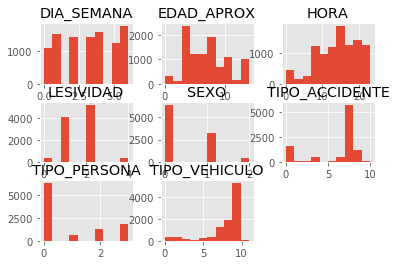

In [570]:
df_accs_lab_sample.drop(['DISTRITO'],1).hist()

plt.show()

In [571]:
df_accs_lab_sample.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'TIPO_ACCIDENTE', 'TIPO_VEHICULO',
       'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],
      dtype='object')

/home/dsc/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


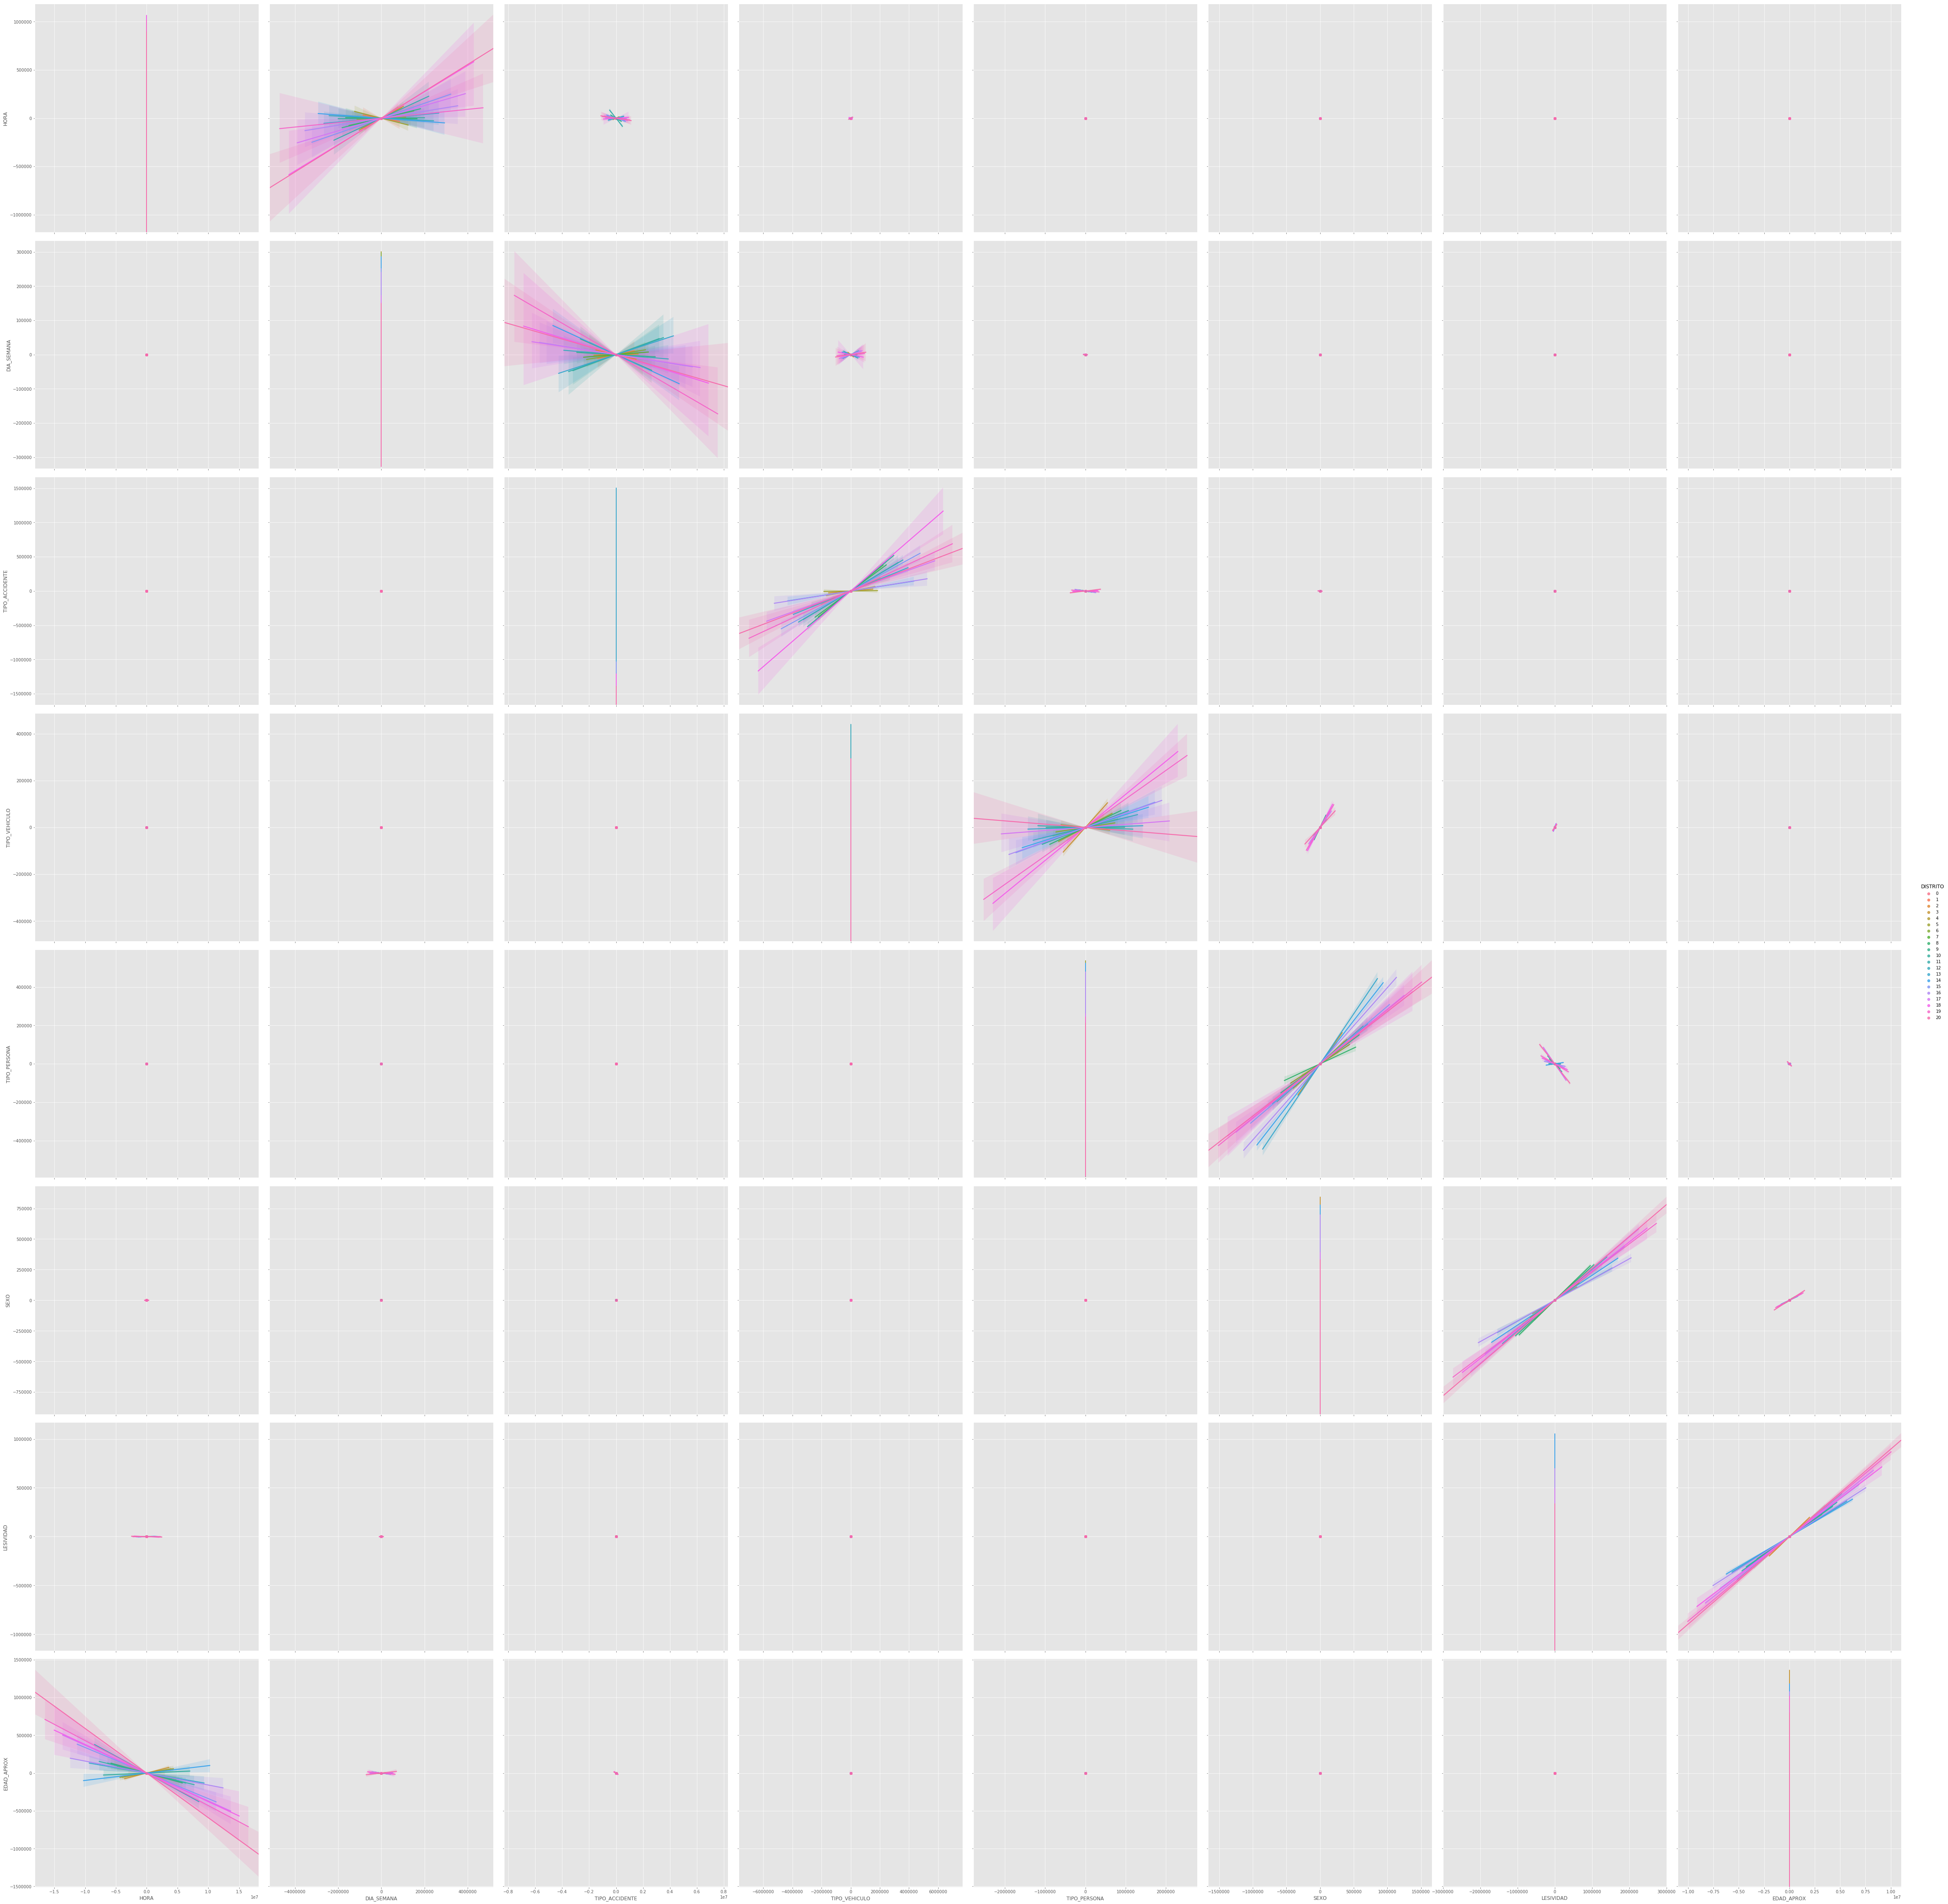

In [573]:
#Y también podemos interrelacionar las entradas de a pares
sb.pairplot(df_accs_lab.dropna(), hue='DISTRITO',size=8,vars=['HORA', 'DIA_SEMANA', \
       'TIPO_ACCIDENTE', 'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],kind='reg')

In [574]:
df_accs_lab_sample.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'TIPO_ACCIDENTE', 'TIPO_VEHICULO',
       'TIPO_PERSONA', 'SEXO', 'LESIVIDAD', 'EDAD_APROX'],
      dtype='object')

/home/dsc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


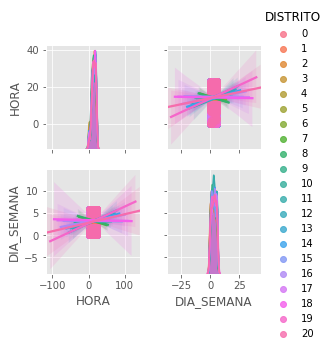

In [575]:
#Y también podemos interrelacionar las entradas de a pares
sb.pairplot(df_accs_lab_sample.dropna(), hue='DISTRITO',height=2,vars=['HORA', 'DIA_SEMANA'],kind='reg')

/home/dsc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


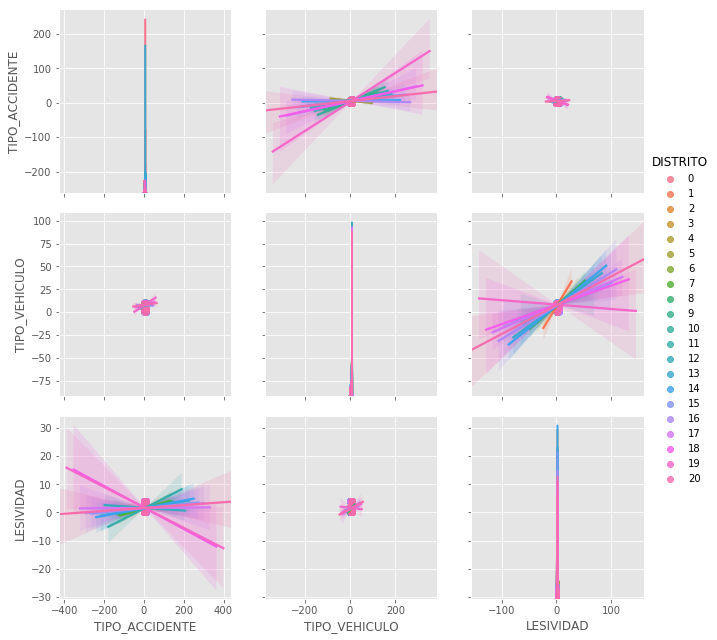

In [576]:
#Y también podemos interrelacionar las entradas de a pares
sb.pairplot(df_accs_lab_sample.dropna(), hue='DISTRITO',height=3,vars=['TIPO_ACCIDENTE', 'TIPO_VEHICULO', \
                                                                       'LESIVIDAD'],kind='reg')

/home/dsc/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


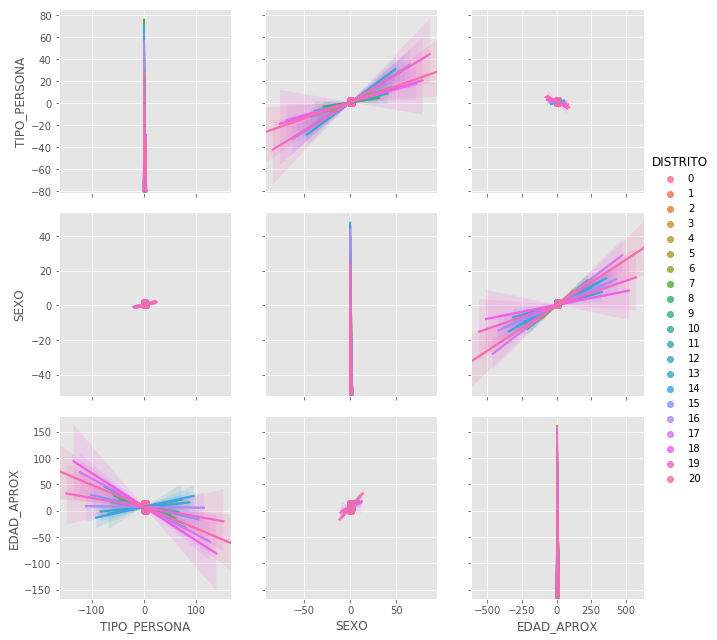

In [577]:
#Y también podemos interrelacionar las entradas de a pares
sb.pairplot(df_accs_lab_sample.dropna(), hue='DISTRITO',size=3,vars=['TIPO_PERSONA', 'SEXO', \
                                                                     'EDAD_APROX'],kind='reg')

In [ ]:
aqui noche

In [256]:
# Cargamos variables con datos de muestra
X = np.array(df_accs_lab_sample.drop(['DISTRITO'],1))
y = np.array(df_accs_lab_sample['DISTRITO'])
X.shape


(10000, 11)

### Regresión Logística con SKLearn

In [257]:
# Creamos el Modelo de Regresión Logística y 
# hacemos que se ajuste (fit) a nuestro conjunto de entradas X y salidas ‘y’.
model_LOGREG = linear_model.LogisticRegression()
model_LOGREG.fit(X,y)

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [261]:
# Clasificamos todo nuestro conjunto de entradas X utilizando el método «predict(X)» para el modelo
# y revisamos algunas de sus salidas para comprobar si coincide con las salidas reales de nuestro origen
predictions_LOGREG = model_LOGREG.predict(X)
print(predictions_LOGREG[0])

4


In [262]:
df_accs_lab['DISTRITO'][0]

4

In [263]:
type(predictions_LOGREG)

numpy.ndarray

In [264]:
predictions_LOGREG.dtype

dtype('int64')

In [265]:
predictions_LOGREG.shape

(10000,)

In [266]:
# Calidad de nuestro modelo, nos devuelve la precisión media de las predicciones
model_LOGREG.score(X,y)

0.0935

## VALIDAR MODELO

In [268]:
# Cargamos variables.
X = np.array(df_accs_lab.drop(['DISTRITO'],1))
y = np.array(df_accs_lab['DISTRITO'])
X.shape


(252998, 11)

In [269]:
# Train-test split
# Load the library
from sklearn.model_selection import train_test_split
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [271]:
# Volvemos a compilar nuestro modelo de Regresión Logística pero esta vez sólo con 80% 
# de los datos de entrada y calculamos el nuevo scoring
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model_LOGREG, X_train, y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: 

Logistic Regression: 0.090752 (0.001275)


In [272]:
# Y ahora hacemos las predicciones (en realidad clasificación) utilizando nuestro «cross validation set»
# es decir del subconjunto que habíamos apartado. 
# Aciertos: xxx %
predictions_LOGREG = model_LOGREG.predict(X_test)
print(accuracy_score(y_test, predictions_LOGREG))

0.08806324110671937


# Resultados del modelo

In [273]:
## Matrix de confusión para los errores
print(confusion_matrix(y_test, predictions_LOGREG))

[[   0    0  105  500 1096    9    3   31    0    0   17    0  440   21
   299    0    1    0    0    0    0]
 [   0    0   37  172  252    1    0    7    0    0    1    0   93    2
    83    0    1    0    0    0    0]
 [   0    0  224  656 1091    4    2   28    0    0   17    0  744   25
   319    0    3    0    0    0    0]
 [   0    0  176 1160 1225   15    2   32    0    0   16    0  504   31
   493    0    4    0    0    0    0]
 [   0    0  166  798 1650   13    3   41    0    0   14    0  561   28
   480    0    3    0    0    0    0]
 [   0    0  137  765 1081    9    2   19    0    0   11    0  398   15
   419    0    4    0    0    0    0]
 [   0    0  187  637 1390   15    7   38    0    0   17    0  595   22
   400    0    4    0    0    0    0]
 [   0    0  158  513 1121    6    3   49    0    0    6    0  518   24
   265    0    2    0    0    0    0]
 [   0    0  100  344  676    7    3   33    0    0    7    0  341    4
   183    0    1    0    0    0    0]
 [   0    

In [275]:
## Informe de clasificación con nuestro conjunto de TEST
# Observamos el promedio de F1-score
print(classification_report(y_test, predictions_LOGREG))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2522
           1       0.00      0.00      0.00       649
           2       0.08      0.07      0.07      3113
           3       0.11      0.32      0.16      3658
           4       0.08      0.44      0.14      3757
           5       0.05      0.00      0.01      2860
           6       0.11      0.00      0.00      3312
           7       0.08      0.02      0.03      2665
           8       0.00      0.00      0.00      1699
           9       0.00      0.00      0.00      2401
          10       0.07      0.01      0.01      2750
          11       0.00      0.00      0.00      1284
          12       0.09      0.25      0.13      3223
          13       0.11      0.02      0.03      2778
          14       0.08      0.13      0.10      3769
          15       0.00      0.00      0.00      2432
          16       0.06      0.00      0.00      2718
          17       0.00    

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Clasificación (o predicción) de nuevos valores

In [277]:
df_accs_lab.columns

Index(['FECHA', 'HORA', 'DIA_SEMANA', 'DISTRITO', 'NUM_PERS_IMPLS',
       'TIPO_ACCIDENTE', 'TIPO_VEHICULO', 'TIPO_PERSONA', 'SEXO', 'LESIVIDAD',
       'EDAD_APROX', 'NUMS_PERS_IMPLS'],
      dtype='object')

In [278]:
df_accs_lab.head(1)

,FECHA,HORA,DIA_SEMANA,DISTRITO,NUM_PERS_IMPLS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX,NUMS_PERS_IMPLS
0,0,0,6,4,1,7,9,0,0,2,3,0


In [ ]:
X_new = pd.DataFrame({'FECHA': [10], 'paginas': [3], 'acciones': [5], 'valor': [9]})
model_LOGREG.predict(X_new)